1. Data (prepare and load)<br>
2. Build Model<br>
3. fitting the model to data<br>
4. making predictions and evaluating a model (inference)<br>
5. saving and loading a model <br>
6. puddint it all together

In [24]:
import torch, torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

# 1. Data (prepareing and loading)

Data can be almost anythibng... in machine learning.
* Excel spreedsheet
* Images of any kind
* Videos (Youtube has a lots of data...)
* Audio like shongs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. BUIld a model to learn pattern in that numerical representation

let's create some known data using the linear regression formula.
we'll use a linear regression formula to make a straight line with *known* ***parameters***

In [25]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = bias + weight*X

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
len(X), len(y)

(50, 50)

# Splitting data into training and test sets 

In [27]:
 # create a train/test split
train_split  = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [28]:
def plot_prediction(train_data = X_train, train_labels = y_train,
                    test_data = X_test, test_label = y_test,
                    prediction=None):
    """
    plot training data, test data and comapres predictions.
    """
    plt.figure(figsize=(10,7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="skyblue", s=4, label="Training data")

    # plot test data in green
    plt.scatter(test_data, test_label, c='black', s=4, label='Tesing data')

    # Are there preidicintion?
    if prediction is not None:
        plt.scatter(test_data, prediction, c='r', s=4, label='Prediction')

    plt.legend()
    plt.show()



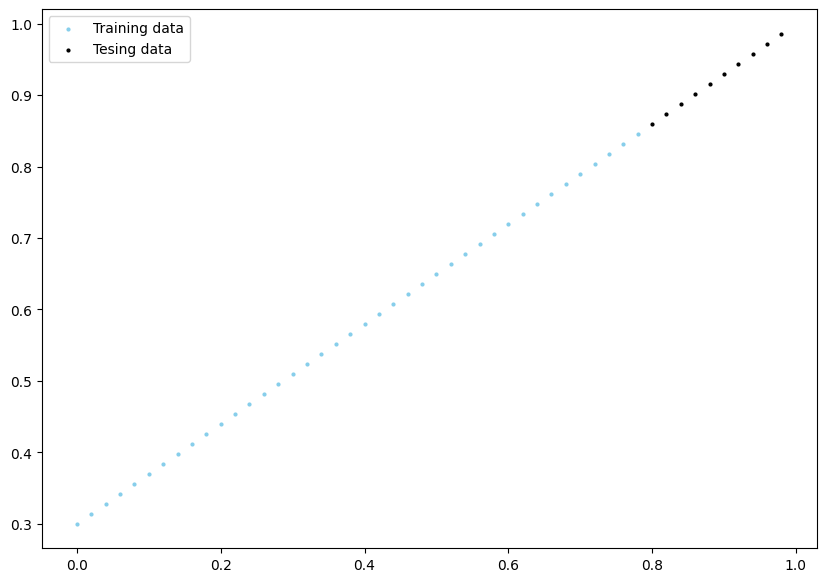

In [29]:
plot_prediction()

# Building model

In [30]:
# Create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): #<= almost everything in PyTorch model inheretes from nn
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return (self.bias + self.weights * x )
        

### Pytorch model building essentials

```c++
torch.nn, torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader
```
```c++
torch.nn.Parameter, torch.nn.Module, def forward()
```

### Checking the contents of our PyTorch model

Now we've creted a model, let's see what's inside
So we can check our model parameters or what's inside our model using `.parameters()`

In [74]:
# Create a random seed
# torch.manual_seed(42)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.5568], requires_grad=True),
 Parameter containing:
 tensor([0.1374], requires_grad=True)]

In [75]:
model_0.state_dict() 

OrderedDict([('weights', tensor([0.5568])), ('bias', tensor([0.1374]))])

In [76]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.5828],
        [0.5940],
        [0.6051],
        [0.6163],
        [0.6274],
        [0.6385],
        [0.6497],
        [0.6608],
        [0.6719],
        [0.6831]])

In [77]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

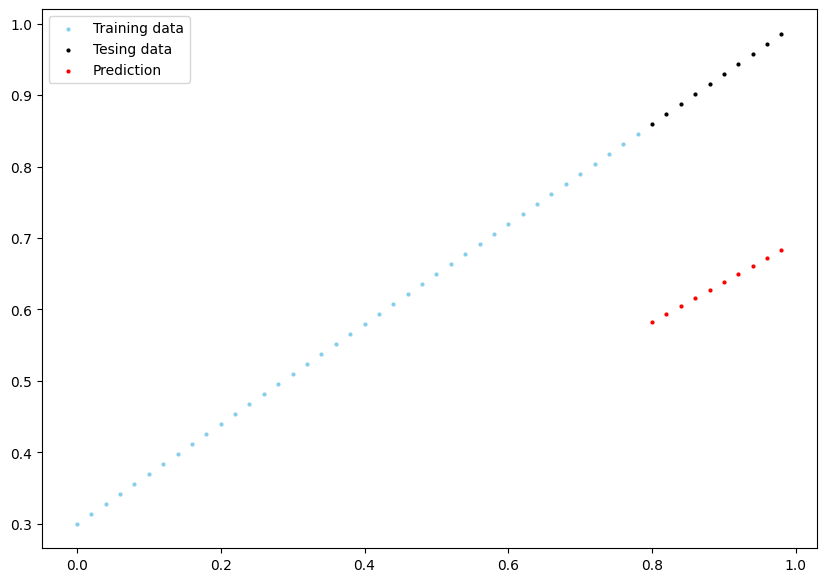

In [78]:
plot_prediction(prediction=y_pred)

## Train model
* **`Loss function:`** Measures how wrong your model's predictions (e.g.: y_preds are compared to the truth labels (e.g. y_test)).
* **`Optimizer:`** Takes into account the loss of the model and adjust the model's parameters (e.g.: wight & bias)

And specially for PyTorch, we need:
* A training loop
* A testing loop

In [79]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.5568], requires_grad=True),
 Parameter containing:
 tensor([0.1374], requires_grad=True)]

In [80]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5568])), ('bias', tensor([0.1374]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient decent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # learning rate (how much 
                            # optimizer should change parameters at 
                            # each steps, hiegher=more
                            # (less stable), 
                            # lower=less(might take a long time))

### Creating an optimization loop in PyTorch
It's time to create a training loop(and testing loop).
The traning loop involves the model going through the training data and learning the relation ships between the *features* and *labels*.

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass/propagation
2. calculate the loss
3. Optimizer zero grad
4. Loss backward (**back_propagation**)
5. Optimizeer setp


In [85]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.5568], requires_grad=True),
 Parameter containing:
 tensor([0.1374], requires_grad=True)]

In [ ]:
# An epoch is one loop through the data...
epochs = 1

# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTroch set
    
    # 1. Forward pass on train 
    y_pred = model_0(X_train)

    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform graident decent)
    optimizer.step() # by defualt how the optimizer changes will accumulate throught the loop so ... we hae to zero them.

    # model_0.eval() # turns of the model loss tracking
